__языковая модель__

char-LSTM

генерирует следующий символ по предыдущим

In [1]:
import gzip
import re
import numpy as np
from numpy import random as rng
import pandas as pd
from tqdm import tqdm
from os.path import join as pjoin

In [2]:
# from utils.helpers import ppr
# from utils.helpers import replace_patterns

In [ ]:
def ppr(df): return print(len(df))

def replace_patterns(s,pat):
    if len(pat)<1: return s
    return  replace_patterns( re.sub(pat[0][0],pat[0][1],s), pat[1:] )

In [3]:
np.set_printoptions(precision=2) # вывод на печать чисел до 2 знака
pd.options.display.max_colwidth=200 

tqdm.pandas()

/usr/lib/python3.9/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [4]:
FOLDER_RESULT='result'

In [ ]:
!mkdir result

## загружаем данные

In [ ]:
# FILE_DATA = '../data/dostoevsky-besy-p2.txt.gz'
# with gzip.open(FILE_DATA,'rt',encoding='utf-8') as f: text = f.read()     
# ppr(text)    

In [7]:
FILE_DATA = '../data/lobas-taxisty.txt.gz'
with gzip.open(FILE_DATA,'rt',encoding='utf-8') as f: text = f.read()     
ppr(text)    

записей: 602 297


In [8]:
print(text[:200]+'...')

Желтые короли. Записки нью-йоркского таксиста.

В.Лобас



Товарищам моим - белым и черным, американцам и эмигрантам из России и Израиля, из Греции и Кореи, арабам, китайцам, полякам и всем прочим так...


In [9]:
pat = [
    [r'([\.!\?;]+)',r'\1\n'],
    ['\n+','\n'],
]

data = pd.DataFrame({'line':replace_patterns(text,pat).split('\n')})
data.head(30)

,line
0,Желтые короли.
1,Записки нью-йоркского таксиста.
2,В.
3,Лобас
4,"Товарищам моим - белым и черным, американцам и эмигрантам из России и Израиля, из Греции и Кореи, арабам, китайцам, полякам и всем прочим таксистам города Нью-Йорк в знак глубокого уважения к их н..."
5,Водитель No 320718
6,"""Я никогда не знал бы многое из того что я знаю, и половины чего достаточно, чтобы отравить навсегда несколько человеческих жизней, если бы мне не пришлось сделаться шофером такси..."
7,""" Из книги ""Ночная дорога"" Гайто Газданова, белогвардейского офицера, который в годы первой эмиграции стал таксистом в Париже"
8,ПРОЛОГ
9,1.


In [10]:
data = data.iloc[6:]

In [11]:
data['line'] = data['line'].str.strip()
data['line'].str.len().describe().astype(int)

count    9222
mean       63
std        60
min         0
25%        23
50%        45
75%        86
max       574
Name: line, dtype: int64

In [12]:
ppr(data)
data = data[ data['line'].str.len()>0 ] 
ppr(data)

записей: 9 222
записей: 9 219


In [13]:
# data[data['line'].str.len()<1]

## очистка данных

In [14]:
# def tokenize(s): 
#     return [ w.strip() for w in re.split(r'\b| ',s) if w.strip() ]

In [15]:
pat = [
    [r'"|\'',' '],
    [r'\(|\)',','],
    ['\d+','D'],
    ['[a-z•^]+',' '],
    ['\n',' '],
    [',',' , '],
    ['-',' - '],
    [r' +',' ',],
]

data['line'] = data['line']\
    .progress_apply(lambda s: replace_patterns(s.lower(),pat).strip() )
#     .progress_apply(tokenize) 

100%|██████████| 9219/9219 [00:00<00:00, 75266.26it/s]


In [16]:
%xdel text

In [17]:
ppr(data)
data.sample(4)

записей: 9 219


,line
5870,"казалось бы , что за беда?"
9025,"- тридцать шесть тысяч , - назвал я самую низкую цифру брокера из южного бронкса."
9095,"маленькая улочка , где живут только очень богатие люди"
6837,"- сперва женись , а потом уж вступай во владение."


In [18]:
# ppr(data)
# data = data[ data['line'].str.len()>0 ] 
# ppr(data)

In [19]:
# data[data['line'].str.len()<1]

## кодируем текст

In [21]:
# алфавит
abc = set(' '.join( data['line'].values.tolist() ) )
len(abc)

44

In [22]:
abc = { a:i+1 for i,a in enumerate(sorted(abc)) }
zero_symbol = '\t'
abc[zero_symbol] = 0
ppr(abc)
# abc

записей: 45


In [23]:
def encode_str(s): 
    return [ abc[c] for c in list(s)]

In [24]:
data['code'] = data['line'].progress_apply(encode_str) 
# lambda s: [ abc[c] for c in list(s)] )

100%|██████████| 9219/9219 [00:00<00:00, 80904.57it/s]


## собираем датасет

In [26]:
hist_deep = 15 # глубина истории контекста (символов)

In [27]:
data['code'].str.len().describe([.1,.25,.5,.75,.9,.95,.99]).astype(int)

count    9219
mean       64
std        62
min         0
10%        11
25%        23
50%        46
75%        87
90%       143
95%       191
99%       293
max       587
Name: code, dtype: int64

In [28]:
ppr(data)
data = data[ data['code'].str.len().between(hist_deep+1,data['code'].str.len().quantile(.95)) ] 
ppr(data)

записей: 9 219
записей: 7 474


In [29]:
# [ контекст, символ ]
def pack_history(s,hd=hist_deep):
    return [ [ s[i-hd:i], s[i] ] for i in range(hd,len(s)) ] 

In [ ]:
d = data['code'].progress_apply(pack_history)

In [ ]:
%%time 

x_context = [] 
x = []
for s in tqdm(d.values.tolist()):
    x_context.append(np.array([ c for c,_ in s ]))
    x.append(np.array([ w for _,w in s ]))
    
x_context = np.vstack(x_context)  # контекст слова
x = np.hstack(x) # номер слова

x_context.shape, x.shape

In [32]:
%xdel d

## модель

In [33]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import plot_model

In [34]:
# from utils.tf_helpers import tf_info
# from IPython.display import display, HTML
# display(HTML(tf_info()))

tensorflow,2.3.1
device,0
name,GeForce GTX 1060 6GB
pci bus id,0000:01:00.0
compute capability,6.1


---

In [35]:
x_context.shape

(361014, 15)

In [36]:
abc_len = len(abc) # размер алфавита
hist_deep = x_context.shape[1] # глубина контекста

code_len = 1024 # размер внутреннего представления контекста

hist_deep, abc_len, code_len, 

(15, 45, 1024)

In [37]:
model_name='char-LSTM'

i = Input(shape=(None, abc_len))
o = LSTM(code_len)(i)
o = Dense(abc_len, activation='softmax')(o)
model = Model(i,o)

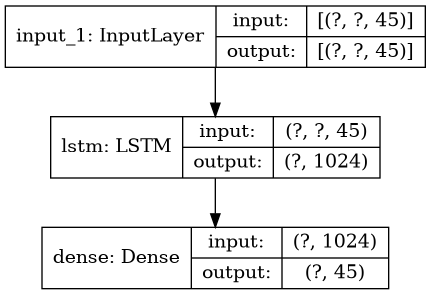

In [38]:
plot_model(model,to_file=pjoin(FOLDER_RESULT,model_name+'.png'), 
                show_layer_names=True, show_shapes=True )

In [39]:
with open( pjoin(FOLDER_RESULT,model_name+'.json'), 'wt') as f: f.write( model.to_json() )

## обучаем модель

In [40]:
learning_rate = 1e-3

optimizer=Adam(lr=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
# np.eye(abc_len,dtype=int)[x_context[:3]].shape
# np.eye(abc_len,dtype=int)[x[:3]].shape

In [42]:
def encode_bin(seq,al=len(abc)):
    return np.eye(al,dtype=int)[seq]

In [43]:
# преобразовать весь датасет в матрицы OHE займёт очень много памяти
# будем делать это в процессе формирования batch
# построим генератор батчей

# x - номера слов, 
# xc- цепочки номеров слов контекста для x
# batch_size - размер пакета данных
def data_gen(x,xc,batch_size):
    bc = np.ceil(x.shape[0]/batch_size).astype(int) # количество пакетов данных
    while True:
        # перемешиваем номера примеров
        rand_idx = rng.permutation(range(x.shape[0]))
        # делим список индексов на части
        batches_idx = np.array_split(rand_idx,bc)
        # последовательно формируем и выдаём пакеты данных
        for ii in batches_idx:
            yield encode_bin(xc[ii,:]), encode_bin(x[ii]) 

In [44]:
# dg = data_gen(x,x_context,batch_size=8)
# wc,w = next(dg)
# wc.shape,w.shape

In [45]:
%%time 

n_epochs = 64
batch_size = 6144

hist = model.fit(
    data_gen(x,x_context,batch_size),
    steps_per_epoch = x.shape[0]//batch_size,
    epochs = n_epochs
)

Epoch 1/64
58/58 [==============================] - 43s 742ms/step - loss: 3.1715 - accuracy: 0.1583
Epoch 2/64
58/58 [==============================] - 43s 745ms/step - loss: 2.8010 - accuracy: 0.2289
Epoch 3/64
58/58 [==============================] - 43s 745ms/step - loss: 2.5279 - accuracy: 0.2768
Epoch 4/64
58/58 [==============================] - 43s 745ms/step - loss: 2.4099 - accuracy: 0.3003
Epoch 5/64
58/58 [==============================] - 43s 746ms/step - loss: 2.3370 - accuracy: 0.3194
Epoch 6/64
58/58 [==============================] - 43s 746ms/step - loss: 2.2660 - accuracy: 0.3393
Epoch 7/64
58/58 [==============================] - 43s 747ms/step - loss: 2.1941 - accuracy: 0.3592
Epoch 8/64
58/58 [==============================] - 43s 747ms/step - loss: 2.1220 - accuracy: 0.3816
Epoch 9/64
58/58 [==============================] - 43s 747ms/step - loss: 2.0499 - accuracy: 0.4012
Epoch 10/64
58/58 [==============================] - 43s 747ms/step - loss: 1.9809 - accura

In [46]:
model.save_weights( pjoin(FOLDER_RESULT,model_name+'-%02d.tf'%(n_epochs) ), save_format='tf') 

---

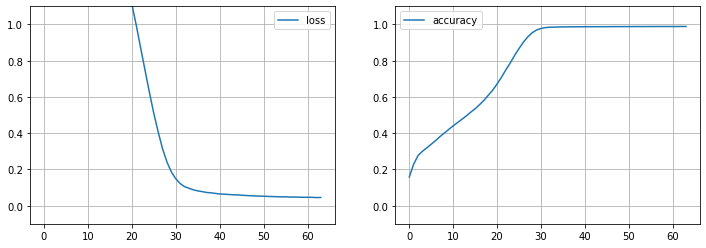

In [47]:
from matplotlib import pyplot as plt

k = hist.history.keys()

w,h = 6,4

fig,ax = plt.subplots(1,len(k),figsize=(w*len(k),h))
for i,n in enumerate(k):
    ax[i].plot(hist.history[n],label=n)
    ax[i].grid(True)
    ax[i].legend()
    ax[i].set_ylim([-.1,1.1])

## тестируем

In [48]:
# !ls result

In [49]:
# from tensorflow.keras.models import model_from_json
# # from tensorflow.keras.models import load_model

# fname='result/charCNN-BiLSTM.json'
# with open( fname, 'rt') as f: model = model_from_json(f.read())
# #model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

# fname = 'result/charCNN-BiLSTM-64.tf'
# model.load_weights( fname )     

In [50]:
abc_inv = { abc[k]:k for k in abc } # декодер символов

In [99]:
# начальный контекст
s = data['line'].sample().values[0][:hist_deep]
s

'все чаще возник'

In [100]:
o = s + ' | ' # результат

for i in range(400):
    t = encode_bin(encode_str(s))[np.newaxis,:]
    p = model.predict(t)
    r = np.argmax(p)
    c = abc_inv[r]
    s = s[1:] + c
    o += c
    if c == '.': break

o

'все чаще возник | ает у меня гнетущее ощущение , что каким - то таинственным образом советские глушилки достают и сюда: в редакционные кабинеты , в студию записи.'

In [101]:
s

' студию записи.'